In [236]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot = True, res)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


In [103]:
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [237]:
print(np.shape(mnist.train.images))

(55000, 784)


In [123]:
print(len(mnist.train.labels[0]))
print(mnist.train.labels[0])
print(mnist.train.num_examples)
print(np.argmax(mnist.train.labels[0]))

10
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
55000
7


In [238]:
batch_x, batch_y = mnist.train.next_batch(64)
print(len(batch_x))
print(len(batch_x[0]))
# print(len(batch_x[0][0]))
# print((batch_x[0][0][0]))

64
784


In [86]:
# parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 100
display_step = 1

n_input = 784
n_classes = 10

In [239]:
from numpy import reshape, shape
batch_x_flat = reshape(batch_x, [-1, n_input])
print(shape(batch_x_flat))

(64, 784)


In [240]:
lin_weights = tf.Variable(tf.zeros([784, 10]))
lin_biases = tf.Variable(tf.zeros(n_classes))

In [241]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(lin_weights))
    print(sess.run(lin_biases))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1

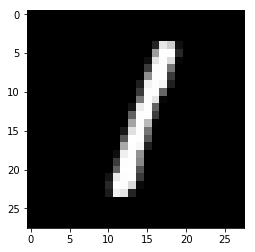

In [242]:
plt.imshow(mnist.train.images[5].reshape(28,28), cmap='gray')
np.argmax(mnist.train.labels[5])

In [243]:
lin_input = tf.placeholder(tf.float32, [None, 784])
lin_classes = tf.placeholder(tf.float32)

lin_input_flat = tf.reshape(lin_input, [-1, n_input])

In [244]:
logits = tf.add(tf.matmul(lin_input, lin_weights), lin_biases)

In [245]:
prediction = tf.nn.softmax(logits)
cross_entropy = -tf.reduce_sum(lin_classes * tf.log(prediction), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

0 0.69274086
1 0.54450166
2 0.42404526
3 0.37072632
4 0.44941697
5 0.34172848
6 0.47231647
7 0.32071075
8 0.38032663
9 0.46786976
10 0.37447113
11 0.39413017
12 0.40146402
13 0.27885234
14 0.32253644
15 0.42458394
16 0.25675803
17 0.39030254
18 0.3776692
19 0.2646469


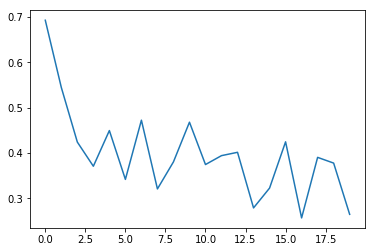

In [247]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batchl1 = []
    for epoch in range(training_epochs):
        average_cost = 0
        min1 = 100
        batchl = []
        
        for batch in range(int(mnist.train.num_examples/batch_size)):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
#             batch_x_flat = reshape(batch_x, [-1, n_input])
            _, l = sess.run([optimizer, loss], feed_dict={lin_input: batch_x, lin_classes: batch_y})
            batchl.append(l)
#             if l < min1:
#                 min1 = l
#                 print(epoch,l)
#             average_cost = average_cost + l
        print(epoch, l)
#         plt.plot(batchl)
#         print(min(batchl))
#         print(int(mnist.train.num_examples/batch_size))
        batchl1.append(l)
    plt.plot(batchl1)

10.89570108760487